# 1. **Converting my Spotify Streaming .json file to .csv file:**

In [1]:
#Importing libraries for the conversion:
import json 
import csv
import pandas as pd
import numpy as np

#Importing libraries for plotting and analysing:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.style as style

#Setting the style:
style.use('seaborn-poster')
sns.set_style('darkgrid')

In [2]:
#Code Credits: GeeksforGeeks.
#Converting .json file to .csv file:
with open('../input/streaming-data/StreamingHistory0.json') as json_file: 
    mydata_json = json.load(json_file) 
    
#Opening a file for writing 
mydata_csv = open('data_file.csv', 'w') 
  
#Creating the csv writer object 
csv_writer = csv.writer(mydata_csv) 
  
#Counter variable used for writing headers to the CSV file 
count = 0
  
for item in mydata_json: 
    if count == 0: 
  
        #Writing headers of CSV file 
        header = item.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    #Writing data of CSV file 
    csv_writer.writerow(item.values()) 
    
mydata_csv.close()

In [3]:
#Reading the generated .csv file with Streaming data:
data = pd.read_csv('./data_file.csv')

#Printing out the first 5 rows of data:
data.head()

,endTime,artistName,trackName,msPlayed
0,2019-09-21 18:29,Fearless Motivation,Your Results Are a Mirror (Motivational Speech),90007
1,2019-09-24 18:59,FINNEAS,I Don't Miss You at All,18791
2,2019-09-25 05:18,The Local Train,Aaftaab,233471
3,2019-09-25 05:22,Armaan Malik,Sau Aasmaan,234737
4,2019-09-25 05:25,Vishal Mishra,Kaise Hua,167575


# 2. **Cleaning the data:**

In [4]:
#Removing the time format since it is not needed:
data['endTime'] = pd.to_datetime(data['endTime'], format ="%Y-%m-%d")
data['endTime'] = data['endTime'].dt.date
data.rename(columns={'endTime' : 'Date'}, inplace= True)
data.sort_values(by='Date', inplace= True)
data.head()

,Date,artistName,trackName,msPlayed
0,2019-09-21,Fearless Motivation,Your Results Are a Mirror (Motivational Speech),90007
1,2019-09-24,FINNEAS,I Don't Miss You at All,18791
2,2019-09-25,The Local Train,Aaftaab,233471
3,2019-09-25,Armaan Malik,Sau Aasmaan,234737
4,2019-09-25,Vishal Mishra,Kaise Hua,167575


# 3. **Saving the new file:**

In [6]:

#Saving the data
data.to_csv('spotify_data.csv',header=True)

# Analysis 1:

In [7]:
data.shape

(9711, 4)


I STREAMED **9711** TRACKS ON SPOTIFY BETWEEN SEPTEMBER 2019-SEPTEMBER 2020

# Analysis 2:

In [8]:

print (round(data.msPlayed.sum()/86400000,2),'days')
print (round(data.msPlayed.sum()/3600000,2),'hours')

15.18 days
364.41 hours


I STREAMED **15.18 DAYS or 364.41 HOURS** OF TRACKS ON SPOTIFY BETWEEN SEPTEMBER 2019-SEPTEMBER 2020

In [9]:
mydata = pd.read_csv('../input/spotify-data/spotify_data.csv', index_col=0,parse_dates=['Date'])

In [10]:
mydata['trackName']= mydata['trackName'].map(lambda x: x.lower())
mydata['minPlayed']= mydata['msPlayed'].map(lambda x: x/60000)
mydata['hrsPlayed']= mydata['msPlayed'].map(lambda x: x/3600000)

In [11]:
mydata.head()

,Date,artistName,trackName,msPlayed,minPlayed,hrsPlayed
0,2019-09-21,Fearless Motivation,your results are a mirror (motivational speech),90007,1.500117,0.025002
1,2019-09-24,FINNEAS,i don't miss you at all,18791,0.313183,0.005220
2,2019-09-25,The Local Train,aaftaab,233471,3.891183,0.064853
3,2019-09-25,Armaan Malik,sau aasmaan,234737,3.912283,0.065205
4,2019-09-25,Vishal Mishra,kaise hua,167575,2.792917,0.046549


# Analysis 3:

In [12]:
len(mydata.artistName.unique())

855

I listend to **855** Artists from Sep,2019 - Sep,2020.

# Analysis 4:

In [13]:
pre_artist = mydata[mydata.Date < '2020-03-01'].artistName.unique()
len(mydata[mydata.Date > '2020-03-01'][~mydata.artistName.isin(pre_artist)].artistName.unique())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


258

I explored **258** Artists after the lockdown began.

# Visualization 1:

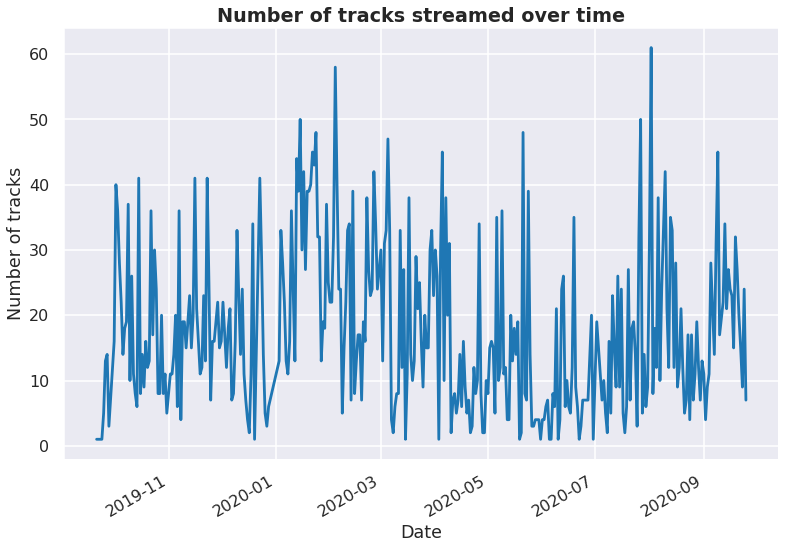

In [14]:
data = mydata.groupby(['Date','trackName'], as_index = False).size().groupby('Date').size()
data.plot.line()
plt.title('Number of tracks streamed over time', fontweight='bold')
plt.ylabel('Number of tracks')
plt.show()

# Visulaization 2:

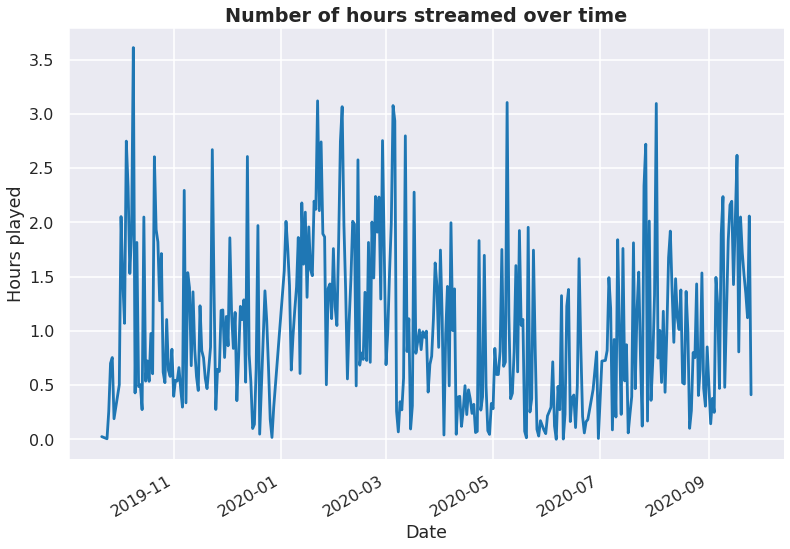

In [15]:
data = mydata.groupby(['Date','hrsPlayed'])['hrsPlayed'].sum().groupby('Date').sum()
data.plot.line()
plt.title('Number of hours streamed over time', fontweight='bold')
plt.ylabel('Hours played')
plt.show()

# Visulaization 3:

In [16]:
def plotBar(data,palette):
    sns.barplot(x=data,y=data.keys(),palette = palette)
    plt.xlabel('Minutes played')
    plt.ylabel('Track_Names')
    plt.title('Top 15 Tracks BEFORE Lockdown began', fontweight='bold')
    plt.show()

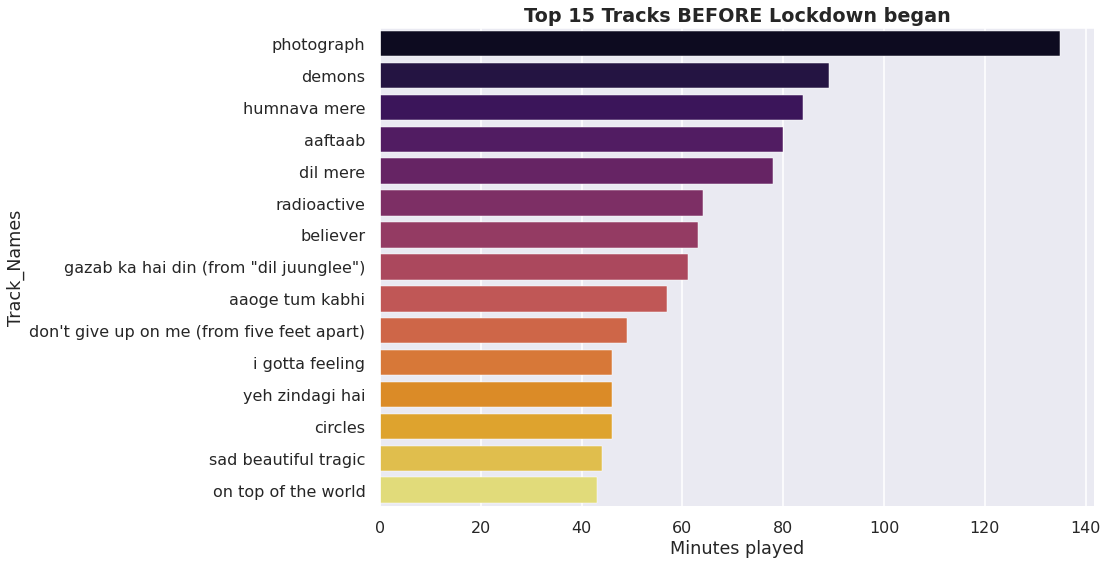

In [17]:
plotBar(mydata[mydata.Date < '2020-03-01'].trackName.value_counts()[:15],'inferno')

# Visulaization 4:

In [18]:
def plotBar(data,palette):
    sns.barplot(x=data,y=data.keys(),palette = palette)
    plt.xlabel('Minutes played')
    plt.ylabel('Track_Names')
    plt.title('Top 15 Tracks AFTER Lockdown began', fontweight='bold')
    plt.show()

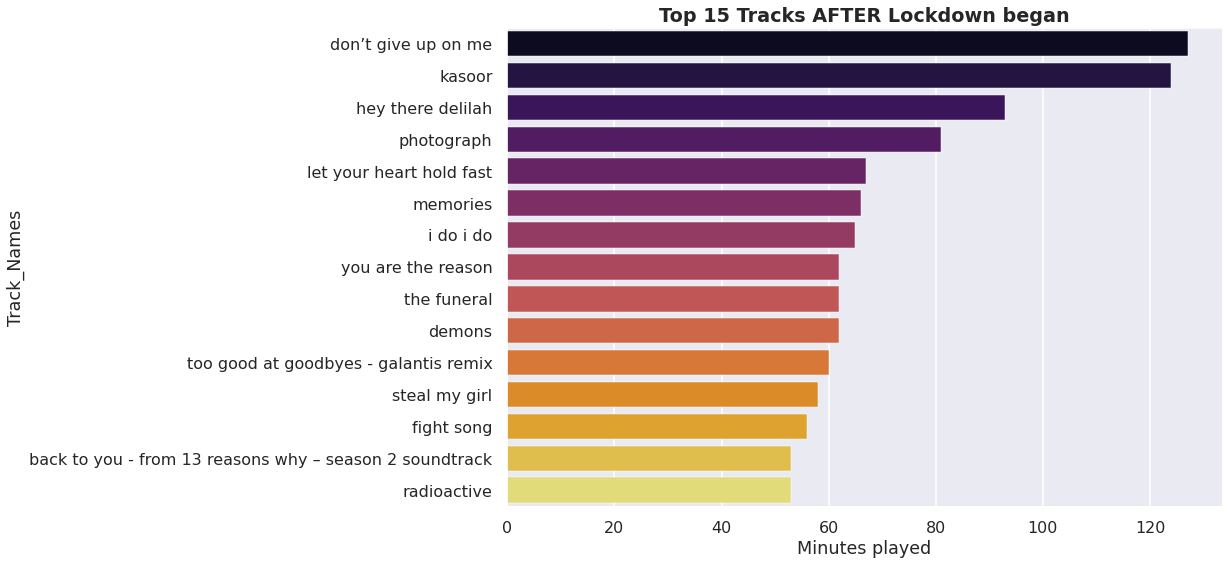

In [19]:
plotBar(mydata[mydata.Date > '2020-03-01'].trackName.value_counts()[:15], 'inferno')

# Visualization 5:

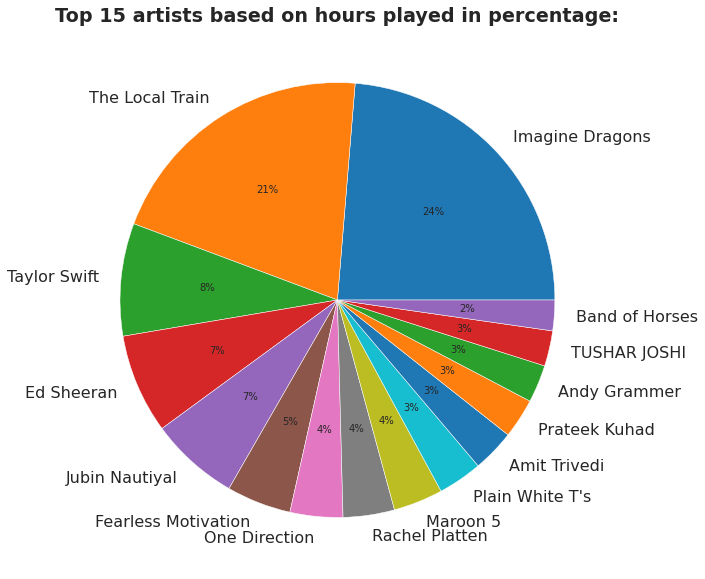

In [20]:
mydata.groupby(['artistName'])['hrsPlayed'].sum().sort_values(ascending=False)[:15].plot.pie(figsize=(10,10), autopct='%1.0f%%')
plt.title('Top 15 artists based on hours played in percentage:', fontweight='bold')
plt.ylabel('')
plt.show()